
## Implementing Pre-Trained model for Image Classification
## Aim: To effectively classify the Images of Dogs and Cats using transfer learning.
## Objective: To build an ResNet50 model to classify the Images of Dogs and Cats
## Dataset: Images of Cats and Dogs

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import splitfolders
import numpy as np



In [ ]:
from google.colab.patches import cv2_imshow
from collections import Counter

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten,BatchNormalization,MaxPool2D
from keras import layers
from keras.applications import ResNet50
from keras.utils import plot_model
from keras.callbacks import EarlyStopping


In [ ]:
splitfolders.ratio("/content/drive/MyDrive/Dl Images", output ="./dataset", seed =42, ratio =(0.80,0.1,0.1))

Copying files: 1320 files [00:04, 302.18 files/s]


In [ ]:
train_datagen =ImageDataGenerator()
train_dataset = train_datagen.flow_from_directory('/content/dataset/train',
                                                   batch_size =32,
                                                  target_size = (224,224),

                                                  class_mode = "categorical",
                                               shuffle =True)
x_train,y_train = train_dataset.next()

valid_datagen =ImageDataGenerator()
valid_dataset = valid_datagen.flow_from_directory('/content/dataset/val',
                                                  batch_size=32,
                                                    target_size = (224,224),

                                                  class_mode = "categorical",
                                                  shuffle =True)
x_val, y_val = valid_dataset.next()

test_datagen = ImageDataGenerator()
test_dataset = test_datagen.flow_from_directory("/content/dataset/test",
                                                batch_size =32,
                                                target_size = (224,224),

                                                class_mode = "categorical",
                                                shuffle =True)
x_test,y_test = test_dataset.next()

Found 1056 images belonging to 3 classes.
Found 132 images belonging to 3 classes.
Found 132 images belonging to 3 classes.


In [ ]:
print("Number of Classes in the Dataset: ", train_dataset.num_classes)
print("Class Labels: ", train_dataset.class_indices)

Number of Classes in the Dataset:  3
Class Labels:  {'Anushka_Sharma': 0, 'Narendra_Modi': 1, 'Sundar_Pichai': 2}


In [ ]:
train_counter = Counter(train_dataset.classes)
test_counter =Counter(test_dataset.classes)
val_counter =Counter(valid_dataset.classes)
print("Number of Images in each Class:")
print("Train: ", train_counter)
print("Test: ", test_counter)
print("Valid: ", val_counter)

Number of Images in each Class:
Train:  Counter({1: 504, 0: 336, 2: 216})
Test:  Counter({1: 63, 0: 42, 2: 27})
Valid:  Counter({1: 63, 0: 42, 2: 27})


In [ ]:
train_dataset.image_shape, test_dataset.image_shape, valid_dataset.image_shape

((224, 224, 3), (224, 224, 3), (224, 224, 3))

In [ ]:
from keras.utils.np_utils import to_categorical
y_train=y_train.astype('int32')
y_val=y_val.astype('int32')
y_test=y_test.astype('int32')

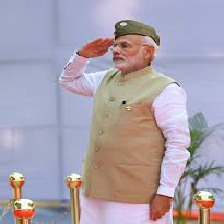

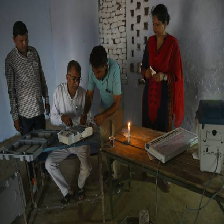

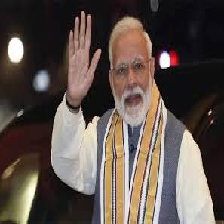

In [ ]:

for i in range(3):
  image = x_train[i]
  img =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
  cv2_imshow(img)

In [ ]:
model =Sequential()
resnet_model = ResNet50(weights ="imagenet", input_shape =(224,224,3), include_top=False)

In [ ]:
for layer in resnet_model.layers:
  layer.trainable=False

In [ ]:
callback=EarlyStopping(monitor="val_loss", mode= "min")

In [ ]:
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(3, activation="softmax"))


In [ ]:
model.compile(optimizer ="adam", loss="categorical_crossentropy", metrics =["accuracy"])

In [ ]:
history = model.fit( x_train, y_train, epochs =5,  validation_data =(x_val, y_val) )

Epoch 1/5
1/1 [==============================] - 22s 22s/step - loss: 1.7472 - accuracy: 0.3750 - val_loss: 237.1992 - val_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 11s 11s/step - loss: 111.9012 - accuracy: 0.6562 - val_loss: 121.7819 - val_accuracy: 0.4375
Epoch 3/5
1/1 [==============================] - 10s 10s/step - loss: 19.0755 - accuracy: 0.8125 - val_loss: 67.1556 - val_accuracy: 0.3125
Epoch 4/5
1/1 [==============================] - 9s 9s/step - loss: 2.7082 - accuracy: 0.9062 - val_loss: 18.2581 - val_accuracy: 0.7188
Epoch 5/5
1/1 [==============================] - 9s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 28.6264 - val_accuracy: 0.6562


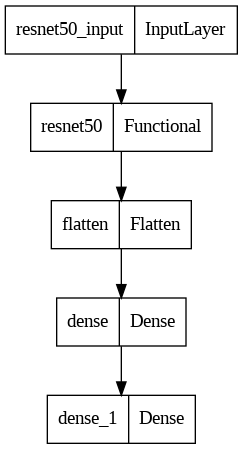

In [ ]:
plot_model(model)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss: ", round(loss,2), "Accuracy: ","%.2f"%accuracy)

1/1 [==============================] - 4s 4s/step - loss: 26.5836 - accuracy: 0.6875
Loss:  26.58 Accuracy:  0.69


In [ ]:
loss, accuracy = model.evaluate(x_train, y_train)
print("Loss: ", round(loss,2), "Accuracy: ","%.2f"%accuracy)

1/1 [==============================] - 7s 7s/step - loss: 0.6311 - accuracy: 0.9688
Loss:  0.63 Accuracy:  0.97


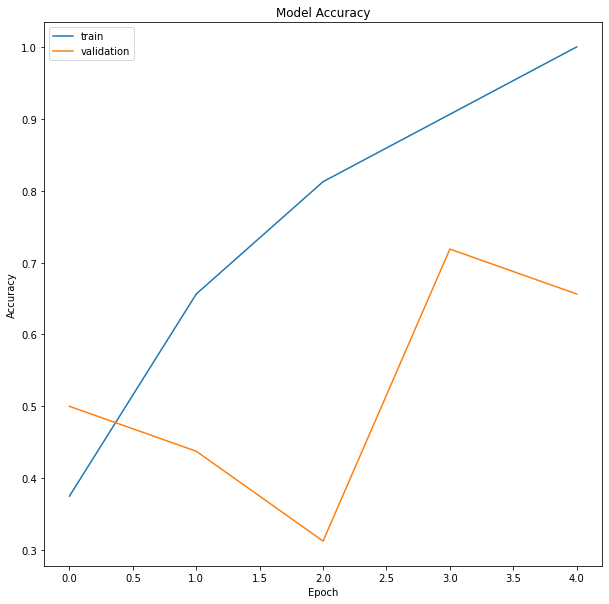

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

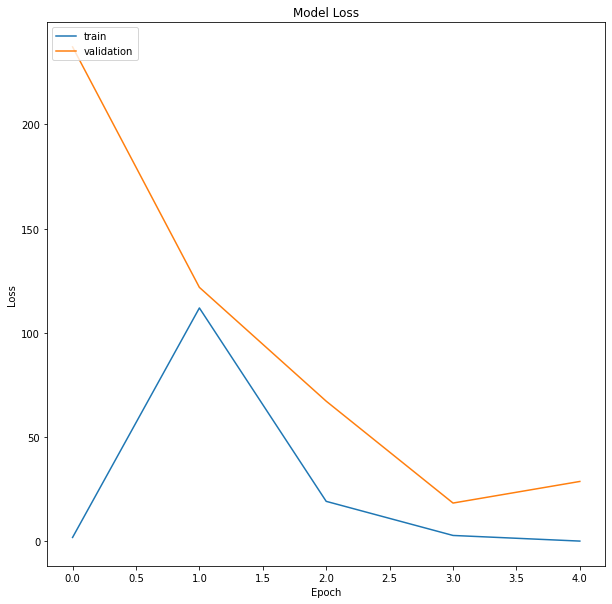

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
def test_image(img):
  test_image = cv2.resize(img, (224,224))
  test_image =test_image.reshape(-1,224,224,3)

  prediction = model.predict(test_image)
  print()
  return "Predicted Class:",np.argmax(prediction)

In [ ]:
print("Class Labels: ", train_dataset.class_indices)

Class Labels:  {'Anushka_Sharma': 0, 'Narendra_Modi': 1, 'Sundar_Pichai': 2}


Test Image


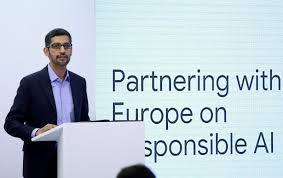

1/1 [==============================] - 1s 1s/step



('Predicted Class:', 0)

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Dl Images/Sundar_Pichai/2Q__ (7).jpg")
print("Test Image")
cv2_imshow(image)
test_image(image)

Test Image


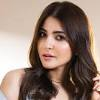

1/1 [==============================] - 0s 179ms/step



('Predicted Class:', 0)

In [ ]:
image = cv2.imread("/content/dataset/test/Anushka_Sharma/images (2).jpg")
print("Test Image")
cv2_imshow(image)
test_image(image)

Test Image


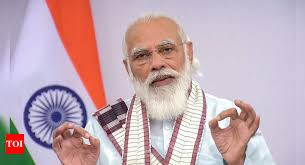

1/1 [==============================] - 0s 192ms/step



('Predicted Class:', 1)

In [ ]:
image = cv2.imread("/content/dataset/test/Narendra_Modi/images (65).jpg")
print("Test Image")
cv2_imshow(image)
test_image(image)

Test Image


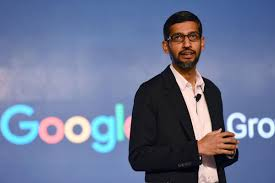

1/1 [==============================] - 0s 231ms/step



('Predicted Class:', 1)

In [ ]:
image = cv2.imread("/content/dataset/test/Sundar_Pichai/images (17).jpg")
print("Test Image")
cv2_imshow(image)
test_image(image)

# Conclusion:
### The dataset consists of 1320 images of Narendra Modi, Sundar Pichai and Anushka Sharma labelled as 1, 2 and 0 respectively. The dataset has been split into train, test and validation and each set consists of 1056 and 132,132 images respectively.
### We have used the pretrained ResNet50 model with the imagenet weights. The model has achieved an accuracy of 100% but, since the test error is greater than the train error, the model is overfitting. This could be due to size of the dataset. Overfitting ccan be overcome either by increasing the number of images or by adding the regularization techniques.